![](../img/banner_day3.png)

<br>

# 3일차 실습(1) - 파이토치(PyTorch)

<br>
<br>
<div align='right'>강사 성민석</div>
<div align='right'>고려대학교 인공지능학과 박사과정</div>
<div align='right'>(minsuksung@korea.ac.kr)</div>

> <font color='red'><b>WARNING</b></font>: 본 컨텐츠는 **[저작권법 제25조 제2항](https://glaw.scourt.go.kr/wsjo/lawod/sjo192.do?contId=2135829&jomunNo=25)** 에 의해 강의 목적으로 이용한 저작물이 포함되어 있습니다.  
> 해당 자료를 제작자의 동의없이 <font color='red'><b>외부에 임의로 공개 및 수정하는 것을 금지</b></font>하며 이를 위반하는 경우 저작권 침해로서 관련법에 따라 처벌될 수 있으니 주의해주시기 바랍니다.

<h1>목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#파이토치-불러오기" data-toc-modified-id="파이토치-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>파이토치 불러오기</a></span></li><li><span><a href="#파이토치에서-제공하는-함수들" data-toc-modified-id="파이토치에서-제공하는-함수들-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>파이토치에서 제공하는 함수들</a></span></li><li><span><a href="#파이토치-Autograd" data-toc-modified-id="파이토치-Autograd-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>파이토치 Autograd</a></span></li><li><span><a href="#모델-구현-및-학습하기" data-toc-modified-id="모델-구현-및-학습하기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>모델 구현 및 학습하기</a></span></li><li><span><a href="#참고자료" data-toc-modified-id="참고자료-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>참고자료</a></span></li></ul></div>

## 파이토치 불러오기
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [12]:
import torch
import numpy as np

In [52]:
torch.cuda.is_available()

True

## 파이토치에서 제공하는 함수들
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [37]:
a = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [38]:
a.shape

torch.Size([9])

In [39]:
a.type

<function Tensor.type>

In [40]:
a[0]

tensor(0)

In [41]:
a[0].item()

0

In [50]:
a[3:]

tensor([3, 4, 5, 6, 7, 8])

In [42]:
a.numpy()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [43]:
a.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [44]:
torch.rand((3,3))

tensor([[0.7159, 0.7704, 0.0083],
        [0.2916, 0.1352, 0.9247],
        [0.2982, 0.9415, 0.7291]])

In [45]:
torch.ones((3,2))

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [46]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [47]:
torch.arange(9)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [48]:
a * 3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [49]:
a + a

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [53]:
a.to('cuda')

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8], device='cuda:0')

## 파이토치 Autograd
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

자동 미분 을 사용하여 신경망에서 역전파 단계의 연산을 자동화할 수 있습니다. PyTorch의 autograd 패키지는 정확히 이런 기능을 제공합니다. Autograd를 사용할 때, 신경망의 순전파 단계는 연산 그래프 를 정의하게 됩니다; 이 그래프의 노드(node)는 Tensor, 엣지(edge)는 입력 Tensor로부터 출력 Tensor를 만들어내는 함수가 됩니다. 이 그래프를 통해 역전파를 하게 되면 변화도를 쉽게 계산할 수 있습니다.

In [51]:
x = torch.ones(2,2,requires_grad=True)  # 드디어 학습시킬 수 있게끔 만들어줌
x # x.requires_grad=True 인 Tensor면 x.grad 는 어떤 스칼라 값에 대한 x 의 변화도를 갖는 또 다른 Tensor

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

그라디언트가 필요한 Single Input이 있을 경우 이것의 output는 또한 그라디언트가 필요합니다. 반대로, 모든 input에 그래디언트가 필요하지 않은 경우엔 output 또한 필요하지 않습니다. 모든 변수들이 그래디언트가 필요하지 않다면 Backward 연산은 하위 그래프에서 이루어지지 않습니다.

출처: [어쩐지 오늘은](https://zzsza.github.io/data/2018/02/03/pytorch-1/)

In [54]:
x.grad # gradient가 없는걸 확인가능

$$ y = x + 2 $$
$$ z = y^2 + 3 $$

In [55]:
y = x + 2
z = y*y + 3
out = z.mean()
print(z,out)

tensor([[12., 12.],
        [12., 12.]], grad_fn=<AddBackward0>) tensor(12., grad_fn=<MeanBackward0>)


In [56]:
out.backward()  # gradient를 흘려보내줌

In [57]:
x.grad  # gradient가 생김

tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])

In [58]:
x.requires_grad 

True

## 모델 구현 및 학습하기
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

![](../img/pipeline2.png)

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F

In [2]:
num_data = 1000
num_epoch = 10000

In [19]:
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
X = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (X**2) + 3
y_true = y + noise

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(1,6)
        self.fc2 = nn.Linear(6,10)
        self.fc3 = nn.Linear(10,6)
        self.fc4 = nn.Linear(6,1)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        output = self.fc4(x)
        return output

In [21]:
model = Net()  # 신경망
model

Net(
  (fc1): Linear(in_features=1, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=6, bias=True)
  (fc4): Linear(in_features=6, out_features=1, bias=True)
)

In [22]:
loss_fn = nn.L1Loss()  # 손실함수
optimizer = optim.SGD(model.parameters(),lr=0.001)  # 최적화함수

In [23]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()  # gradients를 clear해서 새로운 최적화 값을 찾기 위해 준비
    y_pred = model(X) # 준비한 데이터를 model에 input으로 넣어 output을 얻음
    loss = loss_fn(y_pred,y_true)
    loss.backward()  # 그래디언트를 구해서
    optimizer.step()  # 앞서 구한 그래디언트를 통해서 업데이트!!
    
    if i % 500 == 0:
        print(f'Epoch {i:>4} \t Loss: {loss:>4.10f}')
        
    loss_array.append(loss.item())

Epoch    0 	 Loss: 77.5985488892
Epoch  500 	 Loss: 19.0614871979
Epoch 1000 	 Loss: 13.1061983109
Epoch 1500 	 Loss: 6.3533883095
Epoch 2000 	 Loss: 8.6333122253
Epoch 2500 	 Loss: 5.5777578354
Epoch 3000 	 Loss: 5.2168588638
Epoch 3500 	 Loss: 6.7135305405
Epoch 4000 	 Loss: 6.1792216301
Epoch 4500 	 Loss: 5.8730125427
Epoch 5000 	 Loss: 6.4420671463
Epoch 5500 	 Loss: 5.9999427795
Epoch 6000 	 Loss: 5.0412755013
Epoch 6500 	 Loss: 5.1942505836
Epoch 7000 	 Loss: 5.1121211052
Epoch 7500 	 Loss: 5.0143489838
Epoch 8000 	 Loss: 4.9693946838
Epoch 8500 	 Loss: 4.9071946144
Epoch 9000 	 Loss: 4.8178796768
Epoch 9500 	 Loss: 4.9052772522


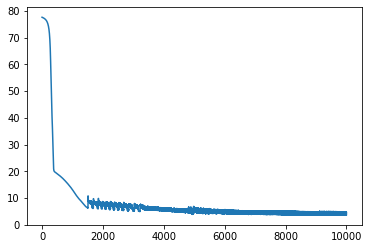

In [24]:
import matplotlib.pyplot as plt
plt.plot(loss_array)
plt.show()

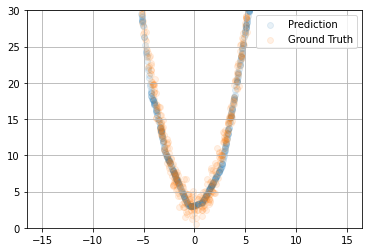

In [25]:
plt.scatter(X,y_pred.detach().numpy(),alpha=0.1,label='Prediction')
plt.scatter(X,y_true,alpha=0.1,label='Ground Truth')
plt.ylim(0,30)
plt.grid(True)
plt.legend()
plt.show()

## 참고자료
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

- ㅇㅇ

<br>

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 모든 자료의 저작권은 성민석에 있으며 제작자의 동의없이 외부로의 무단 복제, 배포 및 전송을 절대로 불허합니다.

<b>Copyright ⓒ 2022. Minsuk Sung. All rights reserved.</b>
</span>

<br>